# Profile

Nama : Chandra Arifin <br/>
Project : Submission 1 <br/>
Machine Learning

# Import Libraries

In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.stem.snowball import SnowballStemmer

# Baca File dan Hapus Kolom

In [2]:
# baca dataset movies
df = pd.read_csv('movies.csv')

In [3]:
#penghapusan kolom yang tidak dipakai
df = df.drop(columns=['year', 'released', 'budget', 'gross', 'director', 'writer', 'star', 'country', 'company', 'runtime', 'votes',
                      'rating', 'score'])

In [4]:
#tampilkan record yang ada
df.head()

,name,genre
0,The Shining,Drama
1,The Blue Lagoon,Adventure
2,Star Wars: Episode V - The Empire Strikes Back,Action
3,Airplane!,Comedy
4,Caddyshack,Comedy


# Pemisahan Kategori dan Penyatuan Data

In [5]:
category = pd.get_dummies(df.genre)

In [6]:
newDF = pd.concat([df, category], axis=1)

In [7]:
newDF = newDF.drop(columns='genre')
newDF

,name,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,Western
0,The Shining,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,The Blue Lagoon,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Star Wars: Episode V - The Empire Strikes Back,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Airplane!,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Caddyshack,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7664,Dream Round,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7665,Saving Mbango,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7666,It's Just Us,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
stopper = set(stopwords.words('english'))

newDF['name'] = newDF['name'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stopper]))

In [9]:
def lemmatisasi(text):
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [10]:
nltk.download('wordnet')
newDF['name'] = newDF['name'].apply(lemmatisasi)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
namaFilm = newDF['name'].values
val = newDF[['Action', 'Adventure', 'Animation']].values

In [12]:
namaFilm

array([list(['Shining']), list(['Blue', 'Lagoon']),
       list(['Star', 'Wars', ':', 'Episode', 'V', '-', 'Empire', 'Strikes', 'Back']),
       ..., list(['Saving', 'Mbango']), list(["'s", 'Us']),
       list(['Tee', 'em', 'el'])], dtype=object)

In [13]:
val

array([[0, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

# Pelatihan dan Test

In [14]:
namaFilm_latih, namaFilm_test, val_latih, val_test = train_test_split(namaFilm, val, test_size=0.2)

In [15]:
namaFilm_latih

array([list(['Testament', 'Youth']), list(['Step', 'Revolution']),
       list(['Percy', 'Jackson', '&', 'Olympians', ':', 'Lightning', 'Thief']),
       ..., list(['Cinderella', 'Story']), list(['Juno']),
       list(['Beautiful', 'Creatures'])], dtype=object)

In [16]:
val_latih

array([[0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

# Tokenizer

In [17]:
token = Tokenizer(num_words=100, oov_token='x')
token.fit_on_texts(namaFilm_latih)
token.fit_on_texts(namaFilm_test)

In [18]:
seq_latih = token.texts_to_sequences(namaFilm_latih)
seq_test = token.texts_to_sequences(namaFilm_test)

pad_latih = pad_sequences(seq_latih)
pad_test = pad_sequences(seq_test)

# Pembuatan Callback

In [19]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

# Pembuatan Model

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=7668, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(32, activation='softmax'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [21]:
numEpoch = 100
# hist = model.fit(pad_latih, val_latih, epochs=numEpoch, validation_data=(pad_test, val_test), callbacks=[callbacks], verbose=2)
hist = model.fit(pad_latih, val_latih, epochs=numEpoch, validation_data=(pad_test, val_test), verbose=2)


Epoch 1/100
192/192 - 18s - loss: 0.3549 - accuracy: 0.0794 - val_loss: 0.3313 - val_accuracy: 0.9048 - 18s/epoch - 95ms/step
Epoch 2/100
192/192 - 1s - loss: 0.3331 - accuracy: 0.8991 - val_loss: 0.3177 - val_accuracy: 0.9048 - 1s/epoch - 8ms/step
Epoch 3/100
192/192 - 1s - loss: 0.3239 - accuracy: 0.8991 - val_loss: 0.3125 - val_accuracy: 0.9048 - 1s/epoch - 5ms/step
Epoch 4/100
192/192 - 1s - loss: 0.3220 - accuracy: 0.8991 - val_loss: 0.3148 - val_accuracy: 0.9048 - 1s/epoch - 7ms/step
Epoch 5/100
192/192 - 2s - loss: 0.3217 - accuracy: 0.8991 - val_loss: 0.3005 - val_accuracy: 0.9048 - 2s/epoch - 8ms/step
Epoch 6/100
192/192 - 1s - loss: 0.3181 - accuracy: 0.8991 - val_loss: 0.3023 - val_accuracy: 0.9048 - 1s/epoch - 6ms/step
Epoch 7/100
192/192 - 1s - loss: 0.3179 - accuracy: 0.8991 - val_loss: 0.2978 - val_accuracy: 0.9048 - 984ms/epoch - 5ms/step
Epoch 8/100
192/192 - 1s - loss: 0.3145 - accuracy: 0.8991 - val_loss: 0.3025 - val_accuracy: 0.9048 - 1s/epoch - 6ms/step
Epoch 9/10

# Pembuatan Grafik

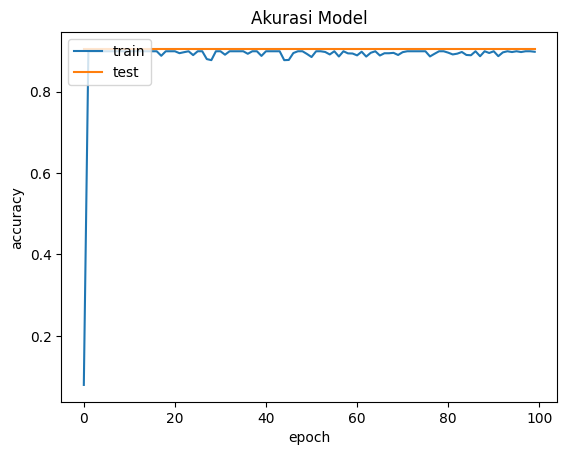

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

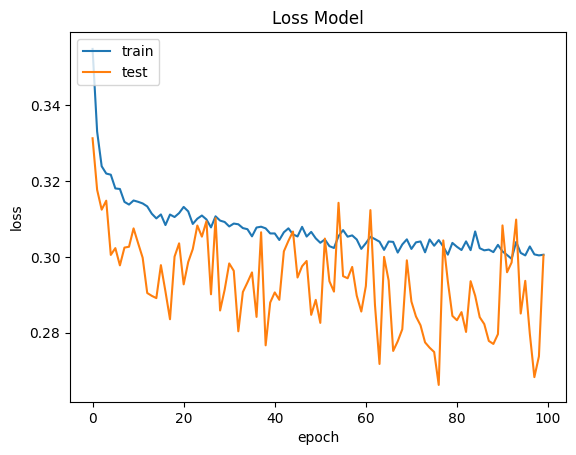

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()